# Importing libraries and inputting dataframe

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from matplotlib.pyplot import Button, Slider
import matplotlib.cm as cm
from matplotlib.pyplot import cm
import numpy as np
import pandas as pd
import seaborn as sns
import ipywidgets as widgets

In [2]:
df_unfiltered_0 = pd.read_csv('https://raw.githubusercontent.com/hemanthhariharan/CCS_RA/main/Output_1.csv')

df_unfiltered_1 = pd.read_csv('https://raw.githubusercontent.com/hemanthhariharan/CCS_RA/main/Output_2.csv')

df_unfiltered_2 = pd.read_csv('https://raw.githubusercontent.com/hemanthhariharan/CCS_RA/main/Output_3.csv')

df_unfiltered_3 = pd.read_csv('https://raw.githubusercontent.com/hemanthhariharan/CCS_RA/main/Output_4.csv')

df_unfiltered_4 = pd.read_csv('https://raw.githubusercontent.com/hemanthhariharan/CCS_RA/main/Output_5.csv')

df_unfiltered_5 = pd.read_csv('https://raw.githubusercontent.com/hemanthhariharan/CCS_RA/main/Output_6.csv')

df_unfiltered_6 = pd.read_csv('https://raw.githubusercontent.com/hemanthhariharan/CCS_RA/main/Output_7.csv')

df_unfiltered_7 = pd.read_csv('https://raw.githubusercontent.com/hemanthhariharan/CCS_RA/main/Output_8.csv')

df_unfiltered_8 = pd.read_csv('https://raw.githubusercontent.com/hemanthhariharan/CCS_RA/main/Output_9.csv')

# Adding additional data below to expand z delta rho g

df_unfiltered_9 = pd.read_csv('https://raw.githubusercontent.com/hemanthhariharan/CCS_RA/main/Output_10.csv')

df_unfiltered_10 = pd.read_csv('https://raw.githubusercontent.com/hemanthhariharan/CCS_RA/main/Output_11.csv')

df_unfiltered_11 = pd.read_csv('https://raw.githubusercontent.com/hemanthhariharan/CCS_RA/main/Output_12.csv')

df_unfiltered_12 = pd.read_csv('https://raw.githubusercontent.com/hemanthhariharan/CCS_RA/main/Output_13.csv')

df_unfiltered_13 = pd.read_csv('https://raw.githubusercontent.com/hemanthhariharan/CCS_RA/main/Output_14.csv')

df_unfiltered_14 = pd.read_csv('https://raw.githubusercontent.com/hemanthhariharan/CCS_RA/main/Output_15.csv')

df_unfiltered_15 = pd.read_csv('https://raw.githubusercontent.com/hemanthhariharan/CCS_RA/main/Output_16.csv')

df_unfiltered_16 = pd.read_csv('https://raw.githubusercontent.com/hemanthhariharan/CCS_RA/main/Output_17.csv')

df_unfiltered_17 = pd.read_csv('https://raw.githubusercontent.com/hemanthhariharan/CCS_RA/main/Output_18.csv')

df_unfiltered = pd.concat([df_unfiltered_0, df_unfiltered_1, df_unfiltered_2, df_unfiltered_3, df_unfiltered_4, df_unfiltered_5, df_unfiltered_6, df_unfiltered_7, df_unfiltered_8, df_unfiltered_9, df_unfiltered_10, df_unfiltered_11, df_unfiltered_12, df_unfiltered_13, df_unfiltered_14, df_unfiltered_15, df_unfiltered_16, df_unfiltered_17], axis=0)


In [3]:
filters = (df_unfiltered.depth_top_res >= 800) & (df_unfiltered['thick_res'] / df_unfiltered['inj_rate'] >= 100) & (df_unfiltered.rho_brine >= 1020)

df = df_unfiltered[filters]

df = df.sort_values(by=['rho_brine', 'inj_rate', 'depth_bottom_usdw', 'depth_top_res', 'thick_res', 'perm_res'])

In [4]:
# AoR - max of plume radius and pressure front radius

df['plume_rad'] = df['plume_rad'] / 1000

df['pressure_front_rad'] = df['pressure_front_rad'] / 1000

df['AoR_rad'] = df[['plume_rad', 'pressure_front_rad']].max(axis=1)

df['depth_diff'] = df['depth_top_res'] - df['depth_bottom_usdw'] # depth difference in m

df

,Unnamed: 0.1,Unnamed: 0,rho_brine,inj_rate,geo_grad,depth_bottom_usdw,depth_top_res,thick_res,perm_res,p_crit,plume_rad,pressure_front_rad,AoR_rad,depth_diff
5670,NaN,5670,1020.0,0.25,25,100.0,800.0,50.0,5.0,1.372,1.300871,7.474679,7.474679,700.0
0,NaN,0,1020.0,0.25,25,100.0,800.0,50.0,10.0,1.372,1.564369,9.212446,9.212446,700.0
5671,NaN,5671,1020.0,0.25,25,100.0,800.0,50.0,10.0,1.372,1.564369,9.212446,9.212446,700.0
5672,NaN,5672,1020.0,0.25,25,100.0,800.0,50.0,15.0,1.372,1.745657,9.876138,9.876138,700.0
5673,NaN,5673,1020.0,0.25,25,100.0,800.0,50.0,20.0,1.372,1.877341,10.587117,10.587117,700.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41972,NaN,41972,1200.0,2.00,25,350.0,2200.0,200.0,800.0,36.260,4.419443,0.000100,4.419443,1850.0
41973,NaN,41973,1200.0,2.00,25,350.0,2200.0,200.0,850.0,36.260,4.577766,0.000100,4.577766,1850.0
41974,NaN,41974,1200.0,2.00,25,350.0,2200.0,200.0,900.0,36.260,4.577766,0.000100,4.577766,1850.0
41975,NaN,41975,1200.0,2.00,25,350.0,2200.0,200.0,950.0,36.260,4.741633,0.000100,4.741633,1850.0


In [5]:
print('rho_brine', df.rho_brine.unique())
print('inj_rate', df.inj_rate.unique())
print('geo_grad', df.geo_grad.unique())
print('depth_bottom_usdw', df.depth_bottom_usdw.unique())
print('depth_top_res', df.depth_top_res.unique())
print('thick_res', df.thick_res.unique())
print('perm_res', df.perm_res.unique())

# Consider only the cases where depth_top_res >= 1000, to respect the pressure and temperature constraints
# in CCSNet

rho_brine [1020. 1030. 1040. 1060. 1080. 1100. 1120. 1160. 1200.]
inj_rate [0.25 0.5  0.75 1.   1.25 1.5  1.75 2.  ]
geo_grad [25]
depth_bottom_usdw [100. 150. 200. 250. 300. 350.]
depth_top_res [ 800.  900. 1000. 1100. 1200. 1300. 1400. 1500. 1600. 1700. 1800. 1900.
 2000. 2100. 2200. 2400. 2600.]
thick_res [ 50.  75. 100. 125. 150. 175. 200.]
perm_res [   5.   10.   15.   20.   25.   30.   35.   40.   45.   50.   70.   90.
  100.  150.  200.  250.  300.  350.  400.  450.  500.  550.  600.  650.
  700.  750.  800.  850.  900.  950. 1000.]


# Defining functions to plot

In [6]:
# New

def plume_perm_plot(rho_brine=1020, inj_rate=0.25, geo_grad=25, depth_bottom_usdw=100, depth_top_res=800, thick_res=50, y_lim=60):

    condition = (df['rho_brine'] == rho_brine) & (df['inj_rate'] == inj_rate) & (df['geo_grad'] == geo_grad) & (df['depth_bottom_usdw'] == depth_bottom_usdw) & (df['depth_top_res'] == depth_top_res) & (df['thick_res'] == thick_res)

    filtered_df = df[condition]

    # plt.clf()

    plt.plot(filtered_df['perm_res'], filtered_df['plume_rad'], label='CO2 plume radius', linewidth=3)
    # plt.plot(filtered_df['perm_res'], filtered_df['pressure_front_rad'], label='Pressure front')
    plt.plot(filtered_df['perm_res'], filtered_df['pressure_front_rad'], label='Critical pressure radius', linewidth=3)
    plt.plot(filtered_df['perm_res'], filtered_df['AoR_rad'], '--',label='Area of Review radius', linewidth=3)
    # plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left', ncol=3)
    plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left')
    plt.scatter(filtered_df['perm_res'], filtered_df['plume_rad'], label='Plume')
    # plt.scatter(filtered_df['perm_res'], filtered_df['pressure_front_rad'], label='Pressure front')
    plt.scatter(filtered_df['perm_res'], filtered_df['pressure_front_rad'], label='Critical pressure')
    plt.scatter(filtered_df['perm_res'], filtered_df['AoR_rad'], label='Area of Review')
    # plt.ylim(0, 1.4 * filtered_df['AoR_rad'].max())
    plt.ylim(0, y_lim)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlabel('Permeability (mD)', fontsize = 12)
    plt.ylabel('Radius (km)', fontsize = 12)
    plt.title('Radius vs permeability', fontsize = 15)
    # plt.legend(loc='upper left')
    # plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left')
    plt.show()

def plume_rho_brine_plot(perm_res=10, inj_rate=0.25, geo_grad=25, depth_bottom_usdw=100, depth_top_res=800, thick_res=50, y_lim=60):

    condition = (df['perm_res'] == perm_res) & (df['inj_rate'] == inj_rate) & (df['geo_grad'] == geo_grad) & (df['depth_bottom_usdw'] == depth_bottom_usdw) & (df['depth_top_res'] == depth_top_res) & (df['thick_res'] == thick_res)

    filtered_df = df[condition]

    # plt.clf()

    plt.plot(filtered_df['rho_brine'], filtered_df['plume_rad'], label='CO2 Plume', linewidth=3)
    # plt.plot(filtered_df['rho_brine'], filtered_df['pressure_front_rad'], label='Pressure front')
    plt.plot(filtered_df['rho_brine'], filtered_df['pressure_front_rad'], label='Critical pressure', linewidth=3)
    plt.plot(filtered_df['rho_brine'], filtered_df['AoR_rad'], '--', label='Area of Review', linewidth=3)
    plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left')
    plt.scatter(filtered_df['rho_brine'], filtered_df['plume_rad'], label='Plume')
    # plt.scatter(filtered_df['rho_brine'], filtered_df['pressure_front_rad'], label='Pressure front')
    plt.scatter(filtered_df['rho_brine'], filtered_df['pressure_front_rad'], label='Critical pressure')
    plt.scatter(filtered_df['rho_brine'], filtered_df['AoR_rad'], label='Area of Review')
    # plt.ylim(0, 1.4 * filtered_df['AoR_rad'].max())
    plt.ylim(0, y_lim)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlabel('Density of brine (kg/m3)', fontsize = 12)
    plt.ylabel('Radius (km)', fontsize = 12)
    plt.title('Radius vs density of brine', fontsize = 15)
    # plt.legend(loc='upper left')
    # plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left')
    plt.show()


def plume_inj_rate_plot(perm_res=10, rho_brine=1020, geo_grad=25, depth_bottom_usdw=100, depth_top_res=800, thick_res=50, y_lim=60):

    condition = (df['perm_res'] == perm_res) & (df['rho_brine'] == rho_brine) & (df['geo_grad'] == geo_grad) & (df['depth_bottom_usdw'] == depth_bottom_usdw) & (df['depth_top_res'] == depth_top_res) & (df['thick_res'] == thick_res)

    filtered_df = df[condition]

    # plt.clf()

    plt.plot(filtered_df['inj_rate'], filtered_df['plume_rad'], label='CO2 plume', linewidth=3)
    # plt.plot(filtered_df['inj_rate'], filtered_df['pressure_front_rad'], label='Pressure front')
    plt.plot(filtered_df['inj_rate'], filtered_df['pressure_front_rad'], label='Critical pressure', linewidth=3)
    plt.plot(filtered_df['inj_rate'], filtered_df['AoR_rad'], '--', label='Area of Review', linewidth=3)
    plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left')
    plt.scatter(filtered_df['inj_rate'], filtered_df['plume_rad'], label='Plume')
    # plt.scatter(filtered_df['inj_rate'], filtered_df['pressure_front_rad'], label='Pressure front')
    plt.scatter(filtered_df['inj_rate'], filtered_df['pressure_front_rad'], label='Critical pressure')
    plt.scatter(filtered_df['inj_rate'], filtered_df['AoR_rad'], label='Area of Review')
    plt.ylim(0, y_lim)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    # plt.ylim(0, 1.4 * filtered_df['AoR_rad'].max())
    plt.xlabel('Injection rate (MT/year)', fontsize = 12)
    plt.ylabel('Radius (km)', fontsize = 12)
    plt.title('Radius vs injection rate', fontsize = 15)
    # plt.legend(loc='upper left')
    # plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left')
    plt.show()

def plume_geo_grad_plot(perm_res=10, rho_brine=1020, inj_rate=0.25, depth_bottom_usdw=100, depth_top_res=800, thick_res=50, y_lim=60):

    condition = (df['perm_res'] == perm_res) & (df['rho_brine'] == rho_brine) & (df['inj_rate'] == inj_rate) & (df['depth_bottom_usdw'] == depth_bottom_usdw) & (df['depth_top_res'] == depth_top_res) & (df['thick_res'] == thick_res)

    filtered_df = df[condition]

    # plt.clf()

    plt.plot(filtered_df['geo_grad'], filtered_df['plume_rad'], label='CO2 plume', linewidth=3)
    # plt.plot(filtered_df['geo_grad'], filtered_df['pressure_front_rad'], label='Pressure front')
    plt.plot(filtered_df['geo_grad'], filtered_df['pressure_front_rad'], label='Critical pressure', linewidth=3)
    plt.plot(filtered_df['geo_grad'], filtered_df['AoR_rad'], '--', label='Area of Review', linewidth=3)
    plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left')
    plt.scatter(filtered_df['geo_grad'], filtered_df['plume_rad'], label='Plume')
    # plt.scatter(filtered_df['geo_grad'], filtered_df['pressure_front_rad'], label='Pressure front')
    plt.scatter(filtered_df['geo_grad'], filtered_df['pressure_front_rad'], label='Critical pressure')
    plt.scatter(filtered_df['geo_grad'], filtered_df['AoR_rad'], label='Area of Review')
    # plt.ylim(0, 1.4 * filtered_df['AoR_rad'].max())
    plt.ylim(0, y_lim)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlabel('Geothermal gradient (oc/km)', fontsize = 12)
    plt.ylabel('Radius (km)', fontsize = 12)
    plt.title('Radius vs geothermal gradient', fontsize = 15)
    # plt.legend(loc='upper left')
    # plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left')
    plt.show()

def plume_depth_bottom_usdw_plot(perm_res=10, rho_brine=1020, inj_rate=0.25, geo_grad=25, depth_top_res=800, thick_res=50, y_lim=60):

    condition = (df['perm_res'] == perm_res) & (df['rho_brine'] == rho_brine) & (df['inj_rate'] == inj_rate) & (df['geo_grad'] == geo_grad) & (df['depth_top_res'] == depth_top_res) & (df['thick_res'] == thick_res)

    filtered_df = df[condition]

    # plt.clf()

    plt.plot(filtered_df['depth_bottom_usdw'], filtered_df['plume_rad'], label='CO2 plume', linewidth=3)
    # plt.plot(filtered_df['depth_bottom_usdw'], filtered_df['pressure_front_rad'], label='Pressure front')
    plt.plot(filtered_df['depth_bottom_usdw'], filtered_df['pressure_front_rad'], label='Critical pressure', linewidth=3)
    plt.plot(filtered_df['depth_bottom_usdw'], filtered_df['AoR_rad'], '--', label='Area of Review', linewidth=3)
    plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left')
    plt.scatter(filtered_df['depth_bottom_usdw'], filtered_df['plume_rad'], label='Plume')
    # plt.scatter(filtered_df['depth_bottom_usdw'], filtered_df['pressure_front_rad'], label='Pressure front')
    plt.scatter(filtered_df['depth_bottom_usdw'], filtered_df['pressure_front_rad'], label='Critical pressure')
    plt.scatter(filtered_df['depth_bottom_usdw'], filtered_df['AoR_rad'], label='Area of Review')
    # plt.ylim(0, 1.4 * filtered_df['AoR_rad'].max())
    plt.ylim(0, y_lim)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlabel('Depth to bottom of USDW (m)', fontsize = 12)
    plt.ylabel('Radius (km)', fontsize = 12)
    plt.title('Radius vs depth to bottom of USDW', fontsize = 15)
    # plt.legend(loc='upper left')
    # plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left')
    plt.show()


def plume_depth_top_res_plot(perm_res=10, rho_brine=1020, inj_rate=0.25, geo_grad=25, depth_bottom_usdw=100, thick_res=50, y_lim=60):

    condition = (df['perm_res'] == perm_res) & (df['rho_brine'] == rho_brine) & (df['inj_rate'] == inj_rate) & (df['geo_grad'] == geo_grad) & (df['depth_bottom_usdw'] == depth_bottom_usdw) & (df['thick_res'] == thick_res)

    filtered_df = df[condition]

    # plt.clf()

    plt.plot(filtered_df['depth_top_res'], filtered_df['plume_rad'], label='CO2 plume', linewidth=3)
    # plt.plot(filtered_df['depth_top_res'], filtered_df['pressure_front_rad'], label='Pressure front')
    plt.plot(filtered_df['depth_top_res'], filtered_df['pressure_front_rad'], label='Critical pressure', linewidth=3)
    plt.plot(filtered_df['depth_top_res'], filtered_df['AoR_rad'], '--', label='Area of Review', linewidth=3)
    plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left')
    plt.scatter(filtered_df['depth_top_res'], filtered_df['plume_rad'], label='Plume')
    # plt.scatter(filtered_df['depth_top_res'], filtered_df['pressure_front_rad'], label='Pressure front')
    plt.scatter(filtered_df['depth_top_res'], filtered_df['pressure_front_rad'], label='Critical pressure')
    plt.scatter(filtered_df['depth_top_res'], filtered_df['AoR_rad'], label='Area of Review')
    # plt.ylim(0, 1.4 * filtered_df['AoR_rad'].max())
    plt.ylim(0, y_lim)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlabel('Depth to top of reservoir (m)', fontsize = 12)
    plt.ylabel('Radius (km)', fontsize = 12)
    plt.title('Radius vs depth to top of reservoir', fontsize = 15)
    # plt.legend(loc='upper left')
    # plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left')
    plt.show()

def plume_thick_res_plot(perm_res=10, rho_brine=1020, inj_rate=0.25, geo_grad=25, depth_bottom_usdw=100, depth_top_res=800, y_lim=60):

    condition = (df['perm_res'] == perm_res) & (df['rho_brine'] == rho_brine) & (df['inj_rate'] == inj_rate) & (df['geo_grad'] == geo_grad) & (df['depth_bottom_usdw'] == depth_bottom_usdw) & (df['depth_top_res'] == depth_top_res)

    filtered_df = df[condition]

    # plt.clf()

    plt.plot(filtered_df['thick_res'], filtered_df['plume_rad'], label='CO2 plume', linewidth=3)
    # plt.plot(filtered_df['thick_res'], filtered_df['pressure_front_rad'], label='Pressure front')
    plt.plot(filtered_df['thick_res'], filtered_df['pressure_front_rad'], label='Critical pressure', linewidth=3)
    plt.plot(filtered_df['thick_res'], filtered_df['AoR_rad'], '--', label='Area of Review', linewidth=3)
    plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left')
    plt.scatter(filtered_df['thick_res'], filtered_df['plume_rad'], label='Plume')
    # plt.scatter(filtered_df['thick_res'], filtered_df['pressure_front_rad'], label='Pressure front')
    plt.scatter(filtered_df['thick_res'], filtered_df['pressure_front_rad'], label='Critical pressure')
    plt.scatter(filtered_df['thick_res'], filtered_df['AoR_rad'], label='Area of Review')
    # plt.ylim(0, 1.4 * filtered_df['AoR_rad'].max())
    plt.ylim(0, y_lim)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlabel('Thickness of reservoir (m)', fontsize = 12)
    plt.ylabel('Radius (km)', fontsize = 12)
    plt.title('Radius vs thickness of reservoir', fontsize = 15)
    # plt.legend(loc='upper left')
    # plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left')
    plt.show()


# Plots

## Radius vs permeability

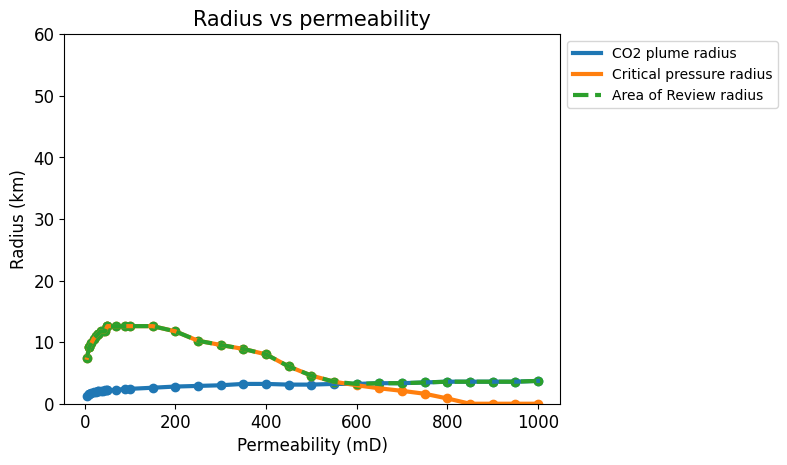

interactive(children=(IntSlider(value=1020, description='rho_brine', max=1100, min=1020, step=20), FloatSlider…

<function __main__.plume_perm_plot(rho_brine=1020, inj_rate=0.25, geo_grad=25, depth_bottom_usdw=100, depth_top_res=800, thick_res=50, y_lim=60)>

In [7]:
widgets.interact(plume_perm_plot, rho_brine=(1020, 1100, 20), inj_rate=(0.25, 2, 0.25), geo_grad=(23, 27, 2), depth_bottom_usdw=(100, 350, 50),
                 depth_top_res=(800, 1800, 100), thick_res=(50, 200, 25), y_lim=(5, 60, 5))

## Radius vs injection rate

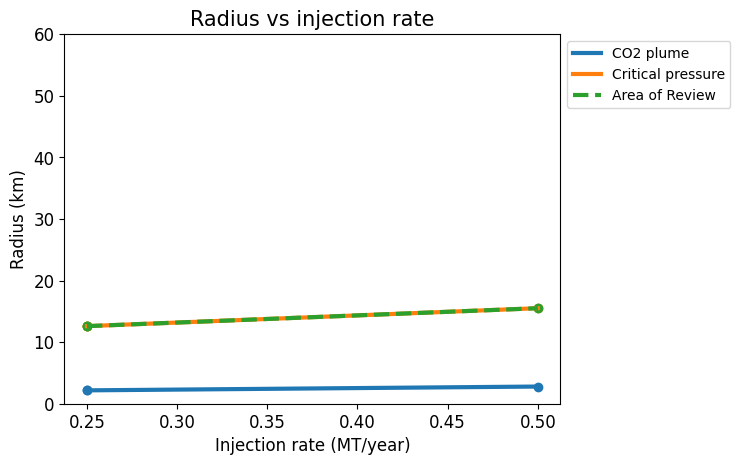

interactive(children=(IntSlider(value=50, description='perm_res', max=1000, min=50, step=50), IntSlider(value=…

<function __main__.plume_inj_rate_plot(perm_res=10, rho_brine=1020, geo_grad=25, depth_bottom_usdw=100, depth_top_res=800, thick_res=50, y_lim=60)>

In [8]:
widgets.interact(plume_inj_rate_plot, perm_res=(50, 1000, 50), rho_brine=(1020, 1100, 20), geo_grad=(23, 27, 2), depth_bottom_usdw=(100, 350, 50),
                 depth_top_res=(800, 1800, 100), thick_res=(50, 200, 25), y_lim=(5, 60, 5))

## Radius vs density of brine

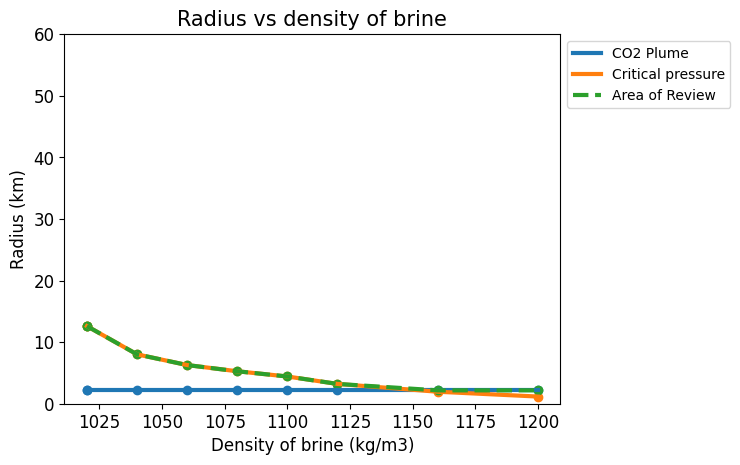

interactive(children=(IntSlider(value=50, description='perm_res', max=1000, min=50, step=50), FloatSlider(valu…

<function __main__.plume_rho_brine_plot(perm_res=10, inj_rate=0.25, geo_grad=25, depth_bottom_usdw=100, depth_top_res=800, thick_res=50, y_lim=60)>

In [9]:
widgets.interact(plume_rho_brine_plot, perm_res=(50, 1000, 50), inj_rate=(0.25, 2, 0.25), geo_grad=(23, 27, 2), depth_bottom_usdw=(100, 350, 50),
                 depth_top_res=(800, 1800, 100), thick_res=(50, 200, 25), y_lim=(5, 60, 5))

## Radius vs depth to bottom of USDW

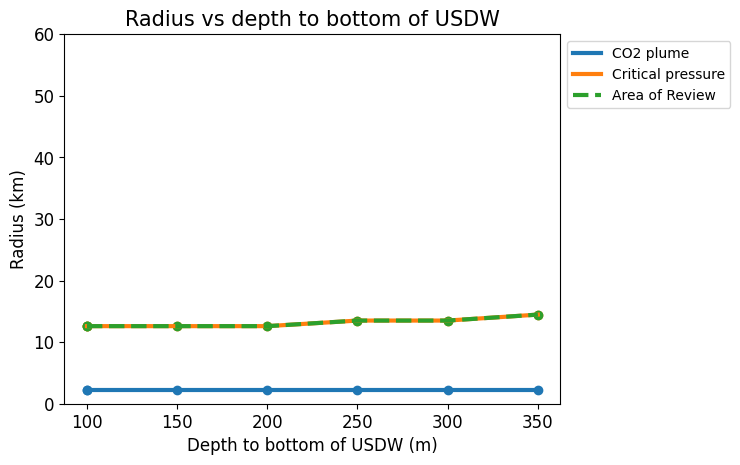

interactive(children=(IntSlider(value=50, description='perm_res', max=1000, min=50, step=50), IntSlider(value=…

<function __main__.plume_depth_bottom_usdw_plot(perm_res=10, rho_brine=1020, inj_rate=0.25, geo_grad=25, depth_top_res=800, thick_res=50, y_lim=60)>

In [10]:
widgets.interact(plume_depth_bottom_usdw_plot, perm_res=(50, 1000, 50), rho_brine=(1020, 1100, 20), inj_rate=(0.25, 2, 0.25), geo_grad=(23, 27, 2),
                 depth_top_res=(800, 1800, 100), thick_res=(50, 200, 25), y_lim=(5, 60, 5))

## Radius vs depth to top of reservoir

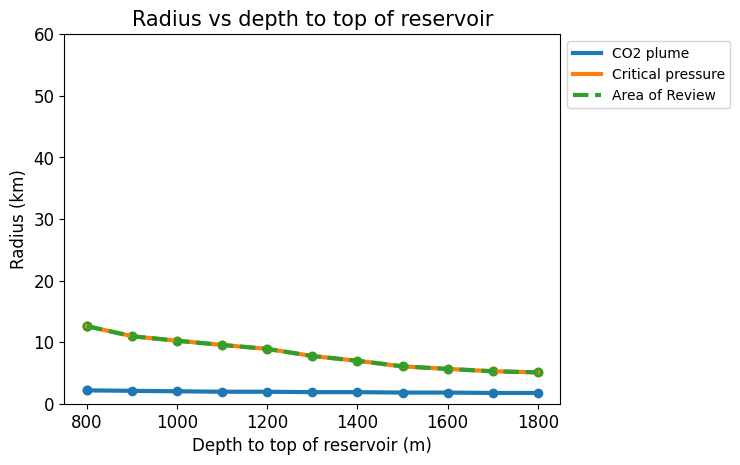

interactive(children=(IntSlider(value=50, description='perm_res', max=1000, min=50, step=50), IntSlider(value=…

<function __main__.plume_depth_top_res_plot(perm_res=10, rho_brine=1020, inj_rate=0.25, geo_grad=25, depth_bottom_usdw=100, thick_res=50, y_lim=60)>

In [11]:
widgets.interact(plume_depth_top_res_plot, perm_res=(50, 1000, 50), rho_brine=(1020, 1100, 20), inj_rate=(0.25, 2, 0.25), geo_grad=(23, 27, 2),
                 depth_bottom_usdw=(100, 350, 50), thick_res=(50, 200, 25), y_lim=(5, 60, 5))

## Radius vs thickness of reservoir

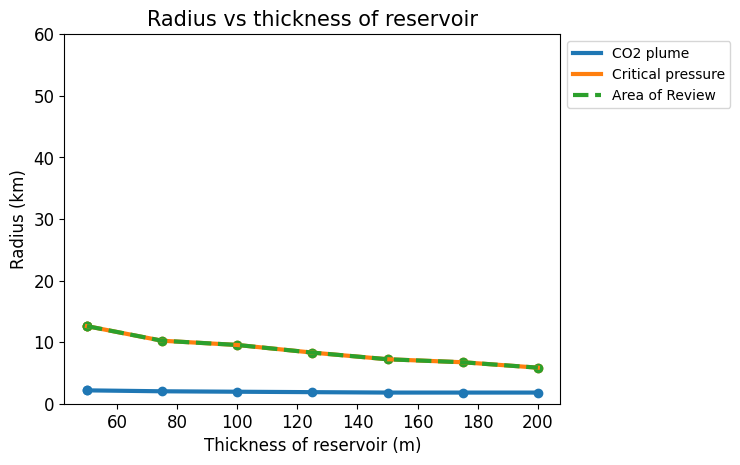

interactive(children=(IntSlider(value=50, description='perm_res', max=1000, min=50, step=50), IntSlider(value=…

<function __main__.plume_thick_res_plot(perm_res=10, rho_brine=1020, inj_rate=0.25, geo_grad=25, depth_bottom_usdw=100, depth_top_res=800, y_lim=60)>

In [12]:
widgets.interact(plume_thick_res_plot, perm_res=(50, 1000, 50), rho_brine=(1020, 1100, 20), inj_rate=(0.25, 2, 0.25), geo_grad=(23, 27, 2),
                 depth_bottom_usdw=(100, 350, 50), depth_top_res=(800, 1800, 100), y_lim=(5, 60, 5))

## Nomogram

In [13]:
df['ra_by_rp'] = df['AoR_rad'] / df['plume_rad']

df['r_pressure_by_r_plume'] = df['pressure_front_rad'] / df['plume_rad']

df['kh_by_Q'] = 9.869233e-16 * df['perm_res'] * df['thick_res'] / df['inj_rate']

df['rho_brine_minus_rho_water'] = df['rho_brine'] - 1000

df['z_delta_rho_g'] = df['depth_diff'] * df['rho_brine_minus_rho_water'] * 9.81 / 1e5 # pressure buildup required for leakage in bar

df

,Unnamed: 0.1,Unnamed: 0,rho_brine,inj_rate,geo_grad,depth_bottom_usdw,depth_top_res,thick_res,perm_res,p_crit,plume_rad,pressure_front_rad,AoR_rad,depth_diff,ra_by_rp,r_pressure_by_r_plume,kh_by_Q,rho_brine_minus_rho_water,z_delta_rho_g
5670,NaN,5670,1020.0,0.25,25,100.0,800.0,50.0,5.0,1.372,1.300871,7.474679,7.474679,700.0,5.745905,5.745905,9.869233e-13,20.0,1.3734
0,NaN,0,1020.0,0.25,25,100.0,800.0,50.0,10.0,1.372,1.564369,9.212446,9.212446,700.0,5.888921,5.888921,1.973847e-12,20.0,1.3734
5671,NaN,5671,1020.0,0.25,25,100.0,800.0,50.0,10.0,1.372,1.564369,9.212446,9.212446,700.0,5.888921,5.888921,1.973847e-12,20.0,1.3734
5672,NaN,5672,1020.0,0.25,25,100.0,800.0,50.0,15.0,1.372,1.745657,9.876138,9.876138,700.0,5.657548,5.657548,2.960770e-12,20.0,1.3734
5673,NaN,5673,1020.0,0.25,25,100.0,800.0,50.0,20.0,1.372,1.877341,10.587117,10.587117,700.0,5.639422,5.639422,3.947693e-12,20.0,1.3734
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41972,NaN,41972,1200.0,2.00,25,350.0,2200.0,200.0,800.0,36.260,4.419443,0.000100,4.419443,1850.0,1.000000,0.000023,7.895386e-11,200.0,36.2970
41973,NaN,41973,1200.0,2.00,25,350.0,2200.0,200.0,850.0,36.260,4.577766,0.000100,4.577766,1850.0,1.000000,0.000022,8.388848e-11,200.0,36.2970
41974,NaN,41974,1200.0,2.00,25,350.0,2200.0,200.0,900.0,36.260,4.577766,0.000100,4.577766,1850.0,1.000000,0.000022,8.882310e-11,200.0,36.2970
41975,NaN,41975,1200.0,2.00,25,350.0,2200.0,200.0,950.0,36.260,4.741633,0.000100,4.741633,1850.0,1.000000,0.000021,9.375771e-11,200.0,36.2970


Text(0.5, 0, 'kh/Q')

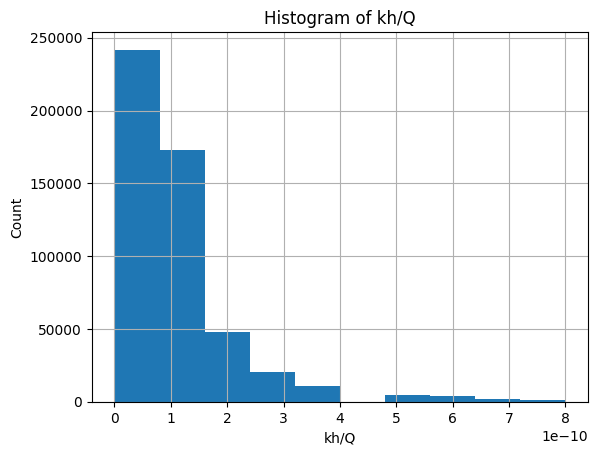

In [14]:
df['kh_by_Q'].round(10).hist()
plt.title('Histogram of kh/Q')
plt.ylabel('Count')
plt.xlabel('kh/Q')

In [15]:
df['kh_by_Q'].round(11).unique()[:11]

array([0.e+00, 1.e-11, 2.e-11, 3.e-11, 4.e-11, 5.e-11, 6.e-11, 7.e-11,
       8.e-11, 9.e-11, 1.e-10])

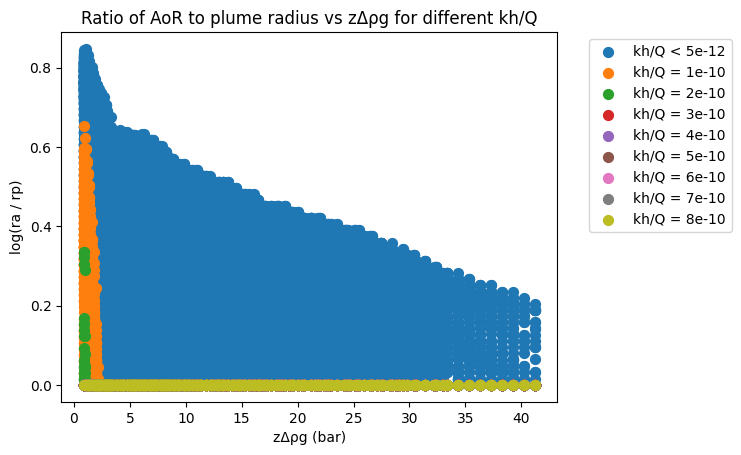

In [16]:
# To plot each figure separately

for kh_by_q in np.sort(df['kh_by_Q'].round(10).unique()):

  filter = (df['kh_by_Q'].round(10) == kh_by_q)

  if kh_by_q == 0:
    kh_by_q = '< 5e-12'
    plt.scatter(df[filter]['z_delta_rho_g'], np.log10(df[filter]['ra_by_rp']), label='kh/Q ' + str(kh_by_q), s=50, alpha=1)

  # filter = (np.isclose(df['kh_by_Q'], 10e-9))
  else:
  # df[filter].plot.scatter(x='z_delta_rho', y='ra_by_rp')
  # plt.figure()
    plt.scatter(df[filter]['z_delta_rho_g'], np.log10(df[filter]['ra_by_rp']), label='kh/Q = ' + str(kh_by_q), s=50, alpha=1) # setting colormap
  # plt.scatter(df[filter]['z_delta_rho_g'], df[filter]['ra_by_rp'], label='kh/Q = ' + str(kh_by_q), alpha=1) # default colors
  plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
  plt.xlabel('zΔρg (bar)')
  plt.ylabel('log(ra / rp)')
  plt.title('Ratio of AoR to plume radius vs zΔρg for different kh/Q')

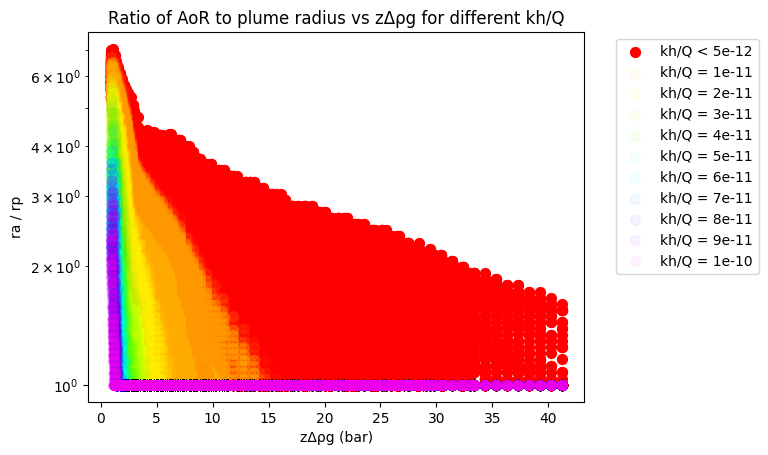

In [17]:
n = 11

color = [
    '#FF0000',
    '#FFAA00',
    '#FFFF00',
    '#C1FF00',
    '#55FF00',
    '#00FFAA',
    '#00FFFF',
    '#008FFF',
    '#5500FF',
    '#A600FF',
    '#FF00F0'
]

i = 0

for kh_by_q in np.sort(df['kh_by_Q'].round(n).unique()[:11]):

  filter = (df['kh_by_Q'].round(n) == kh_by_q)

  if kh_by_q == 0:
    kh_by_q = '< 5e-12'
    plt.scatter(df[filter]['z_delta_rho_g'], df[filter]['ra_by_rp'], label='kh/Q ' + str(kh_by_q), s=50, c=color[i], alpha=1)
    # plt.yscale('log')

  else:
    plt.scatter(df[filter]['z_delta_rho_g'], df[filter]['ra_by_rp'], label='kh/Q = ' + str(kh_by_q), s=50, c=color[i], alpha=0.05) # default colors
  plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
  plt.xlabel('zΔρg (bar)')
  plt.ylabel('ra / rp')
  # plt.xscale('log')
  plt.yscale('log')
  plt.title('Ratio of AoR to plume radius vs zΔρg for different kh/Q')

  i+= 1

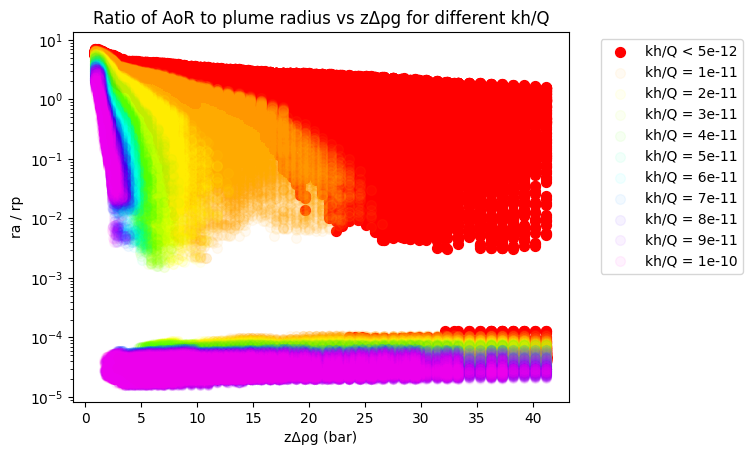

In [18]:
n = 11

color = [
    '#FF0000',
    '#FFAA00',
    '#FFFF00',
    '#C1FF00',
    '#55FF00',
    '#00FFAA',
    '#00FFFF',
    '#008FFF',
    '#5500FF',
    '#A600FF',
    '#FF00F0'
]

i = 0

for kh_by_q in np.sort(df['kh_by_Q'].round(n).unique()[:11]):

  filter = (df['kh_by_Q'].round(n) == kh_by_q)

  if kh_by_q == 0:
    kh_by_q = '< 5e-12'
    plt.scatter(df[filter]['z_delta_rho_g'], df[filter]['r_pressure_by_r_plume'], label='kh/Q ' + str(kh_by_q), s=50, c=color[i], alpha=1)
    # plt.yscale('log')

  else:
    plt.scatter(df[filter]['z_delta_rho_g'], df[filter]['r_pressure_by_r_plume'], label='kh/Q = ' + str(kh_by_q), s=50, c=color[i], alpha=0.05) # default colors
  plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
  plt.xlabel('zΔρg (bar)')
  plt.ylabel('ra / rp')
  # plt.xscale('log')
  plt.yscale('log')
  plt.title('Ratio of AoR to plume radius vs zΔρg for different kh/Q')

  i+= 1

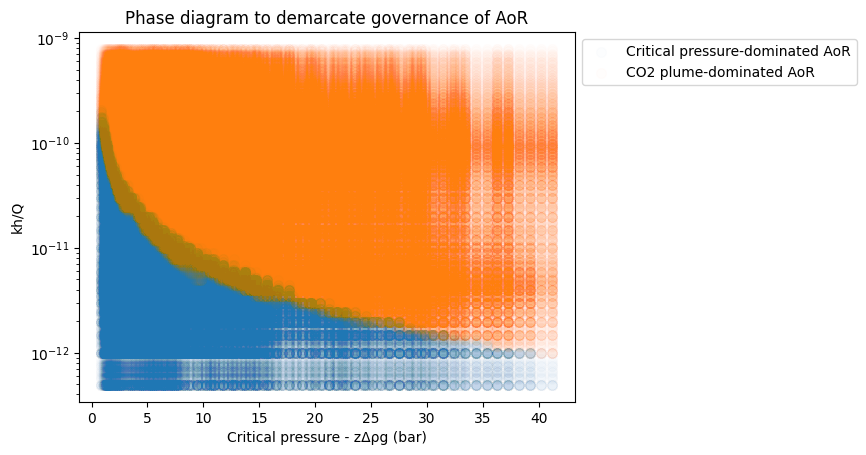

In [19]:
filter1 = (df['ra_by_rp'] > 1.0000) # & (df['kh_by_Q'] < 1e-10) # & (df['z_delta_rho_g'] < 2)
filter2 = (df['ra_by_rp'] == 1.0000) # & (df['kh_by_Q'] < 1e-10) # & (df['z_delta_rho_g'] < 2)

plt.scatter(df[filter1]['z_delta_rho_g'], df[filter1]['kh_by_Q'], label='Critical pressure-dominated AoR', s=50, alpha=0.01)
plt.xlabel('Critical pressure - zΔρg (bar)')
plt.ylabel('kh/Q')
plt.scatter(df[filter2]['z_delta_rho_g'], df[filter2]['kh_by_Q'], label='CO2 plume-dominated AoR', s=50, alpha=0.01)
plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left')
plt.title('Phase diagram to demarcate governance of AoR')
plt.yscale('log')

In [20]:
print('Pressure governed', len(df[filter1]))
print('Plume governed', len(df[filter2]))

Pressure governed 112510
Plume governed 393328


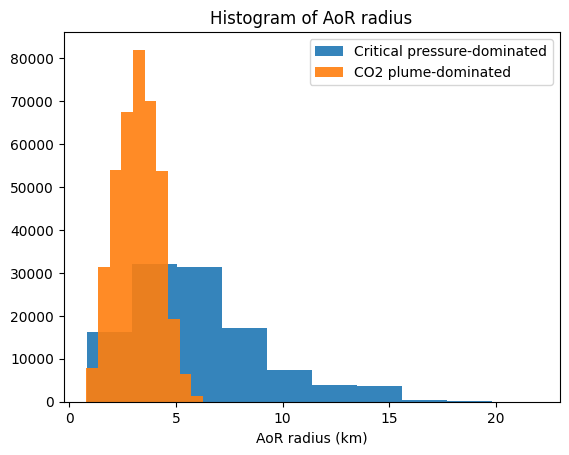

In [21]:
plt.hist(df[filter1]['AoR_rad'], label='Critical pressure-dominated', alpha=0.9)
plt.hist(df[filter2]['AoR_rad'], label='CO2 plume-dominated', alpha=0.9)
plt.xlabel('AoR radius (km)')
plt.title('Histogram of AoR radius')
plt.legend()